In [1]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# %% [markdown]
### 1. Importazione librerie
# %%
import time
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm  # Versione per notebook
import sys
sys.setrecursionlimit(100000)

# Configurazione grafica
sns.set_theme(style="whitegrid", palette="colorblind", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 300

In [1]:
def quicksort(arr):
    def partition(A, p, q):
        x = A[q]
        i = p - 1
        for j in range(p, q):
            if A[j] <= x:
                i += 1
                A[i], A[j] = A[j], A[i]
        A[i+1], A[q] = A[q], A[i+1]
        return i + 1

    def quicksort_recursive(A, p, q):
        if p < q:
            r = partition(A, p, q)
            quicksort_recursive(A, p, r-1)
            quicksort_recursive(A, r+1, q)
    
    quicksort_recursive(arr, 0, len(arr)-1)
    return arr

def quicksort_3way(arr):
    def quicksort_3way_recursive(arr, l, r):
        if l >= r:
            return
        lt = l
        i = l
        gt = r
        pivot = arr[l]
        while i <= gt:
            if arr[i] < pivot:
                arr[lt], arr[i] = arr[i], arr[lt]
                lt += 1
                i += 1
            elif arr[i] > pivot:
                arr[i], arr[gt] = arr[gt], arr[i]
                gt -= 1
            else:
                i += 1
        quicksort_3way_recursive(arr, l, lt-1)
        quicksort_3way_recursive(arr, gt+1, r)
    
    quicksort_3way_recursive(arr, 0, len(arr)-1)
    return arr

def counting_sort(arr):
    if len(arr) == 0:
        return arr
    
    max_val = max(arr)
    min_val = min(arr)
    
    count = [0] * (max_val - min_val + 1)
    for num in arr:
        count[num - min_val] += 1
    
    z = 0
    for i in range(len(count)):
        while count[i] > 0:
            arr[z] = i + min_val
            z += 1
            count[i] -= 1
    return arr

def radix_sort(arr):
    if len(arr) == 0:
        return arr
        
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        buckets = [[] for _ in range(10)]
        for num in arr:
            digit = (num // exp) % 10
            buckets[digit].append(num)
        
        arr = [num for bucket in buckets for num in bucket]
        exp *= 10
    return arr

In [3]:
#measure_resolution(), initialize_array(), measure_initialization_time(), measure_algorithm_time()
def measure_resolution():
    """Misura la risoluzione del clock di sistema"""
    start = time.perf_counter()
    while time.perf_counter() == start:
        pass
    end = time.perf_counter()
    return end - start

def initialize_array(n, m):
    """Genera un array di n interi casuali nell'intervallo [1, m]"""
    return [random.randint(1, m) for _ in range(n)]

def measure_initialization_time(n, m, min_time):
    """Misura il tempo medio di inizializzazione dell'array"""
    count = 0
    start_time = time.perf_counter()
    
    while True:
        arr = initialize_array(n, m)
        count += 1
        end_time = time.perf_counter()
        if end_time - start_time >= min_time:
            break
    
    total_time = end_time - start_time
    return total_time / count

def measure_algorithm_time(algorithm, n, m, min_time, avg_init_time=None):
    """Misura il tempo medio di esecuzione dell'algoritmo"""
    count = 0
    start_time = time.perf_counter()
    
    while True:
        arr = initialize_array(n, m)
        algorithm(arr.copy())  # Usiamo una copia per preservare l'array originale
        count += 1
        end_time = time.perf_counter()
        if end_time - start_time >= min_time:
            break
    
    total_time = end_time - start_time
    avg_total_time = total_time / count
    
    if avg_init_time is not None:
        return avg_total_time - avg_init_time
    return avg_total_time

In [4]:
# %%
resolution = measure_resolution()
T_min = resolution * 1.5  # Formula data: T_min = R * (1/2 + 1)

# Configurazione algoritmi
ALGORITHMS = {
    'QuickSort': quicksort,
    'QuickSort3Way': quicksort_3way,
    'CountingSort': counting_sort,
    'RadixSort': radix_sort
}

# Parametri per le serie geometriche
N_POINTS = 100
N_MIN, N_MAX = 100, 100000
M_MIN, M_MAX = 10, 1000000
N_FIXED = 10000
M_FIXED = 100000

# Generazione valori per n e m (serie geometrica)
n_values = [int(N_MIN * (N_MAX / N_MIN) ** (i / (N_POINTS - 1))) for i in range(N_POINTS)]
m_values = [int(M_MIN * (M_MAX / M_MIN) ** (i / (N_POINTS - 1))) for i in range(N_POINTS)]

In [5]:
def run_experiments():
    results = []
    
    # Esperimento 1: Variazione di n (m fissato a 100000)
    print("="*50)
    print("ESPERIMENTO 1: Variazione dimensione array (n)")
    print("="*50)
    
    for n in tqdm(n_values, desc="Variazione n"):
        # Misura tempo medio inizializzazione
        avg_init_time = measure_initialization_time(n, M_FIXED, T_min)
        
        for algo_name, algorithm in ALGORITHMS.items():
            # Evita CountingSort per n molto grandi
            if algo_name == 'CountingSort' and n > 50000:
                continue
                
            avg_time = measure_algorithm_time(algorithm, n, M_FIXED, T_min, avg_init_time)
            results.append({
                'algorithm': algo_name,
                'n': n,
                'm': M_FIXED,
                'time': avg_time,
                'type': 'Variazione n'
            })
    
    # Esperimento 2: Variazione di m (n fissato a 10000)
    print("\n" + "="*50)
    print("ESPERIMENTO 2: Variazione range valori (m)")
    print("="*50)
    
    for m in tqdm(m_values, desc="Variazione m"):
        # Misura tempo medio inizializzazione
        avg_init_time = measure_initialization_time(N_FIXED, m, T_min)
        
        for algo_name, algorithm in ALGORITHMS.items():
            # Evita algoritmi non adatti per m molto grandi
            if algo_name == 'CountingSort' and m > 100000:
                continue
                
            avg_time = measure_algorithm_time(algorithm, N_FIXED, m, T_min, avg_init_time)
            results.append({
                'algorithm': algo_name,
                'n': N_FIXED,
                'm': m,
                'time': avg_time,
                'type': 'Variazione m'
            })
    
    # Esperimento 3: Caso peggiore per QuickSort (array ordinato)
    print("\n" + "="*50)
    print("ESPERIMENTO 3: Caso peggiore QuickSort")
    print("="*50)
    
    for n in tqdm(n_values[:50], desc="Caso peggiore"):  # Limita a 50 punti per efficienza
        # Crea array ordinato (caso peggiore per QuickSort)
        arr = list(range(1, n+1))
        
        # Misura diretta senza inizializzazione
        def measure_worst_case(algorithm):
            count = 0
            start_time = time.perf_counter()
            while True:
                arr_copy = arr.copy()
                algorithm(arr_copy)
                count += 1
                end_time = time.perf_counter()
                if end_time - start_time >= T_min:
                    break
            return (end_time - start_time) / count
        
        # Misura per QuickSort classico
        avg_time_qs = measure_worst_case(quicksort)
        results.append({
            'algorithm': 'QuickSort (worst)',
            'n': n,
            'm': n,
            'time': avg_time_qs,
            'type': 'Caso peggiore'
        })
        
        # Misura per QuickSort 3-way
        avg_time_qs3 = measure_worst_case(quicksort_3way)
        results.append({
            'algorithm': 'QuickSort3Way (worst)',
            'n': n,
            'm': n,
            'time': avg_time_qs3,
            'type': 'Caso peggiore'
        })
    
    return pd.DataFrame(results)

In [6]:
df = run_experiments()
df.to_csv('sorting_algorithms_data.csv', index=False)

ESPERIMENTO 1: Variazione dimensione array (n)


Variazione n:   0%|          | 0/100 [00:00<?, ?it/s]


ESPERIMENTO 2: Variazione range valori (m)


Variazione m:   0%|          | 0/100 [00:00<?, ?it/s]


ESPERIMENTO 3: Caso peggiore QuickSort


Caso peggiore:   0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
# Filtra i dati per tipo di esperimento
df_n = df[df['type'] == 'Variazione n']
df_m = df[df['type'] == 'Variazione m']
df_worst = df[df['type'] == 'Caso peggiore']

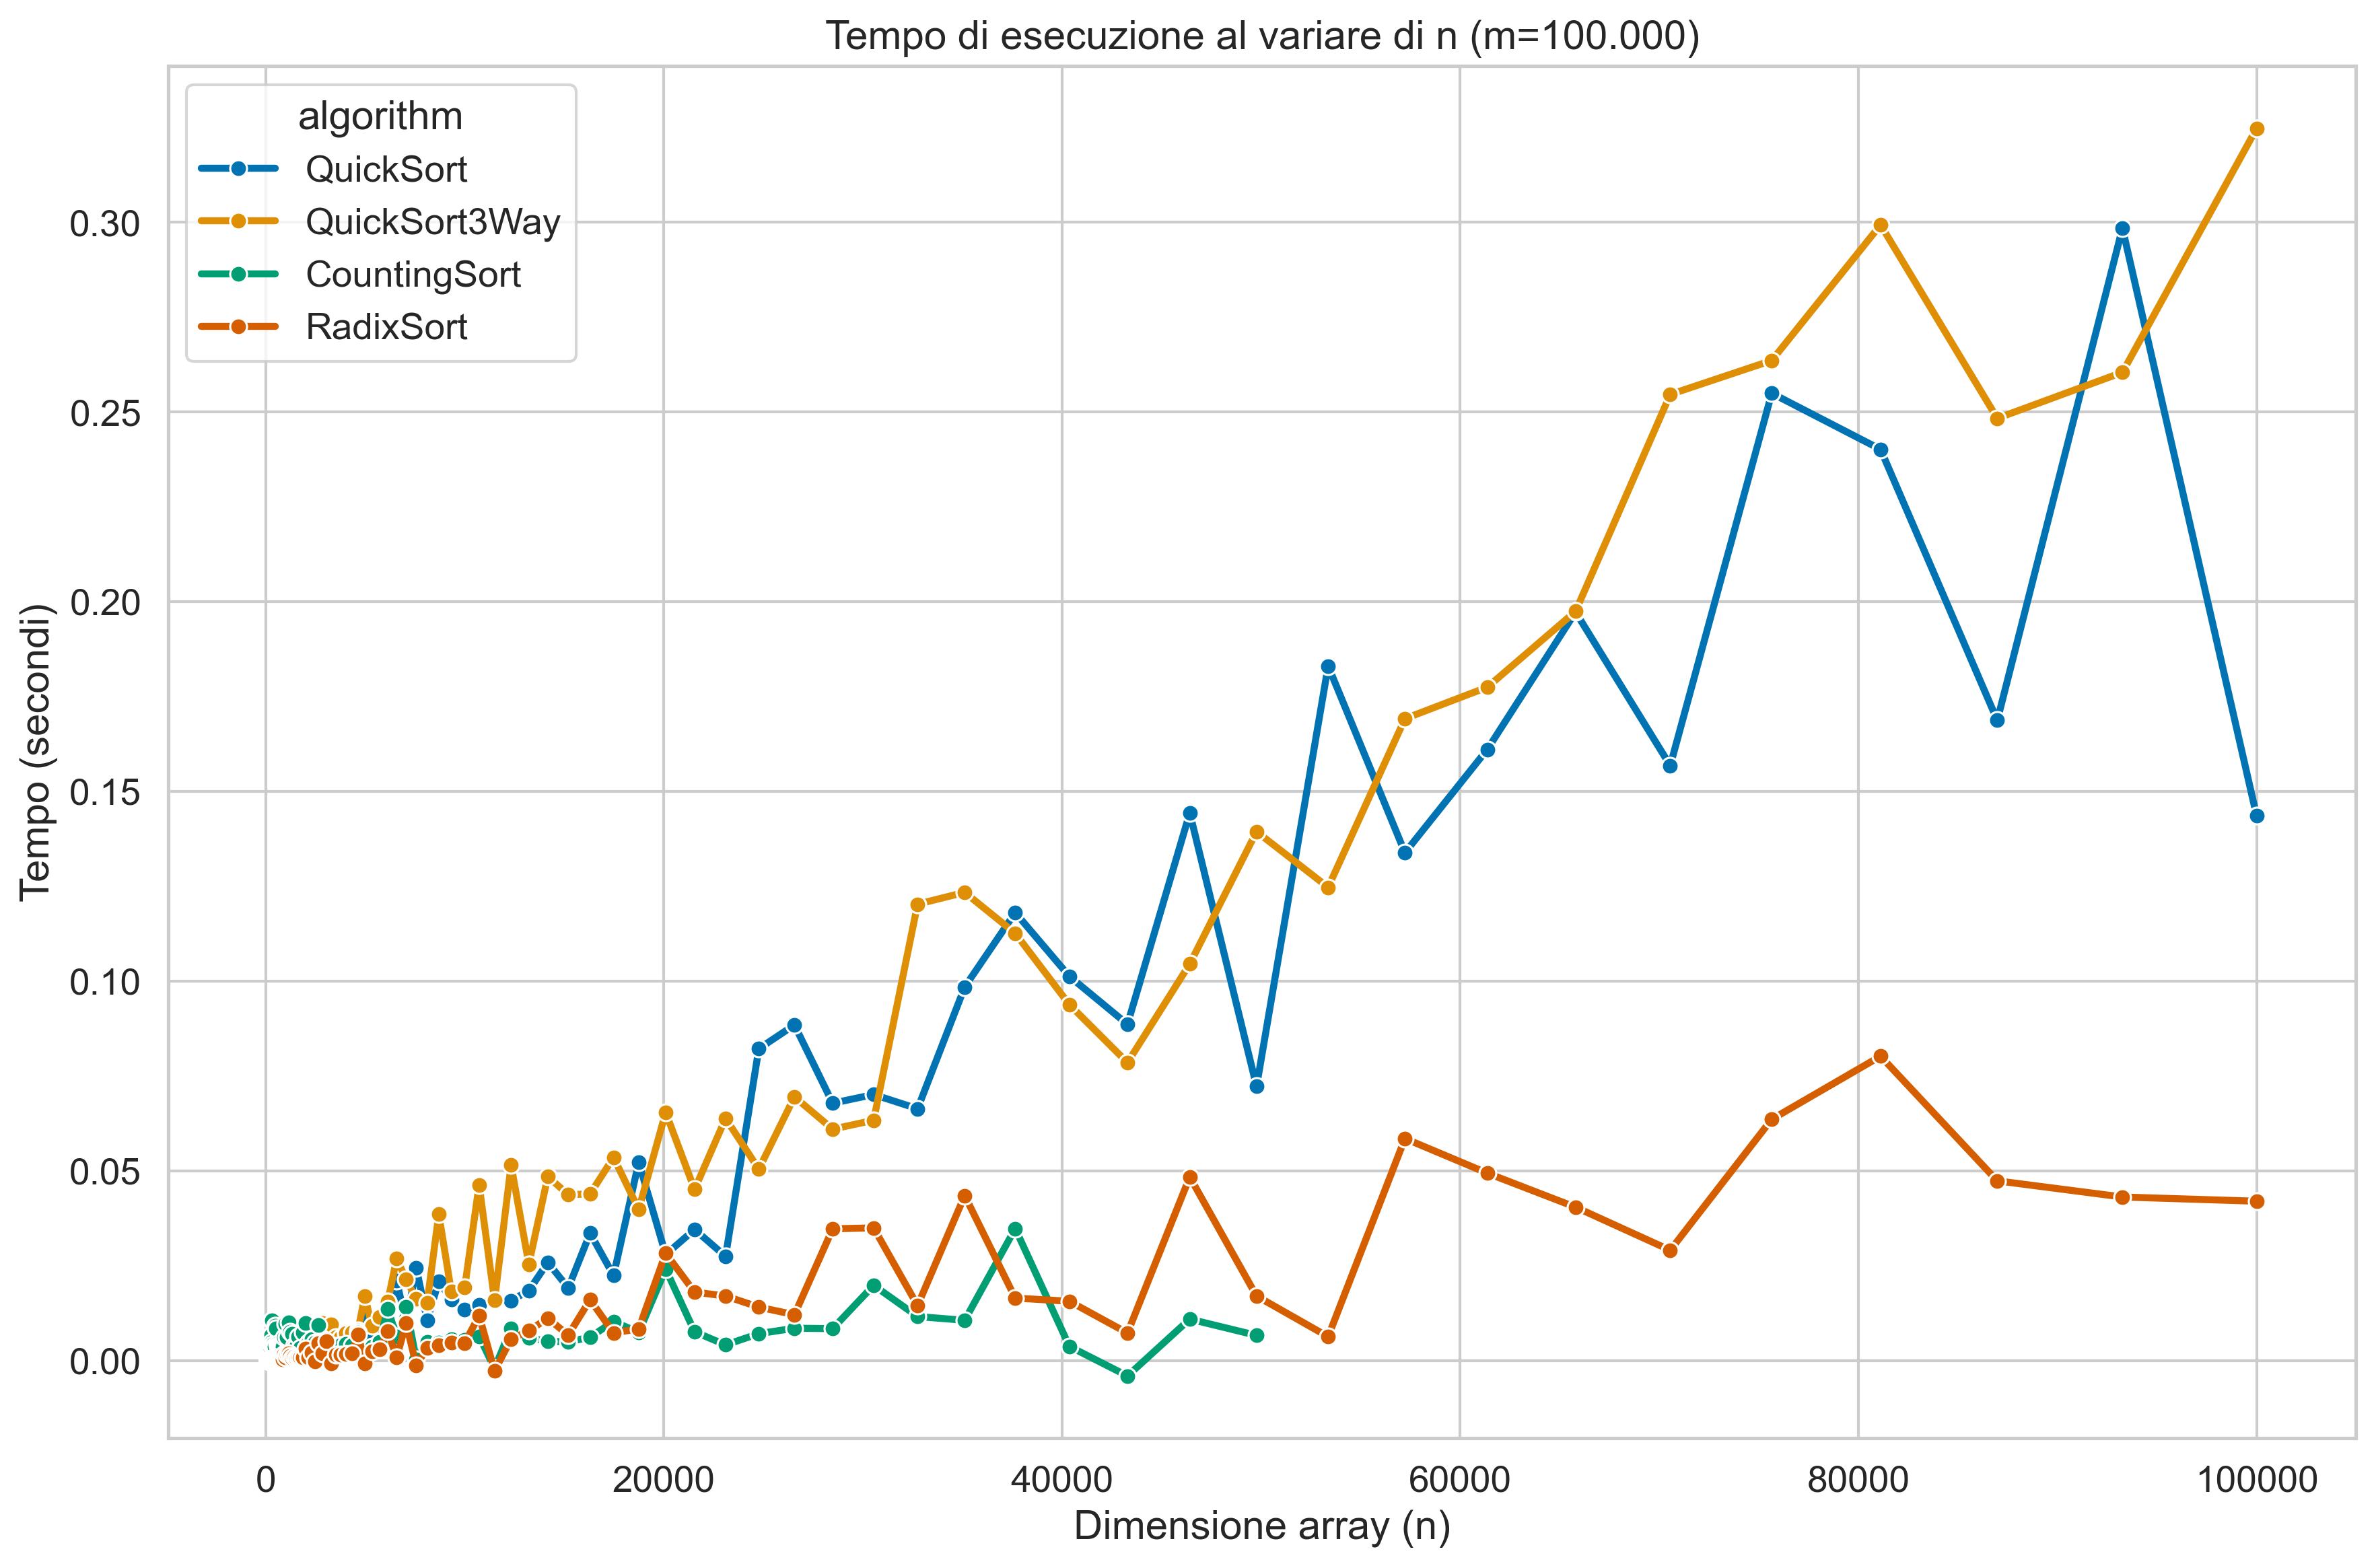

In [8]:
# GRAFICO 1: Tempo vs n (scala lineare)
plt.figure()
sns.lineplot(data=df_n, x='n', y='time', hue='algorithm', 
             marker='o', markersize=6, linewidth=2.5)
plt.title("Tempo di esecuzione al variare di n (m=100.000)")
plt.xlabel("Dimensione array (n)")
plt.ylabel("Tempo (secondi)")
plt.tight_layout()
plt.savefig('tempo_vs_n_lineare.png')

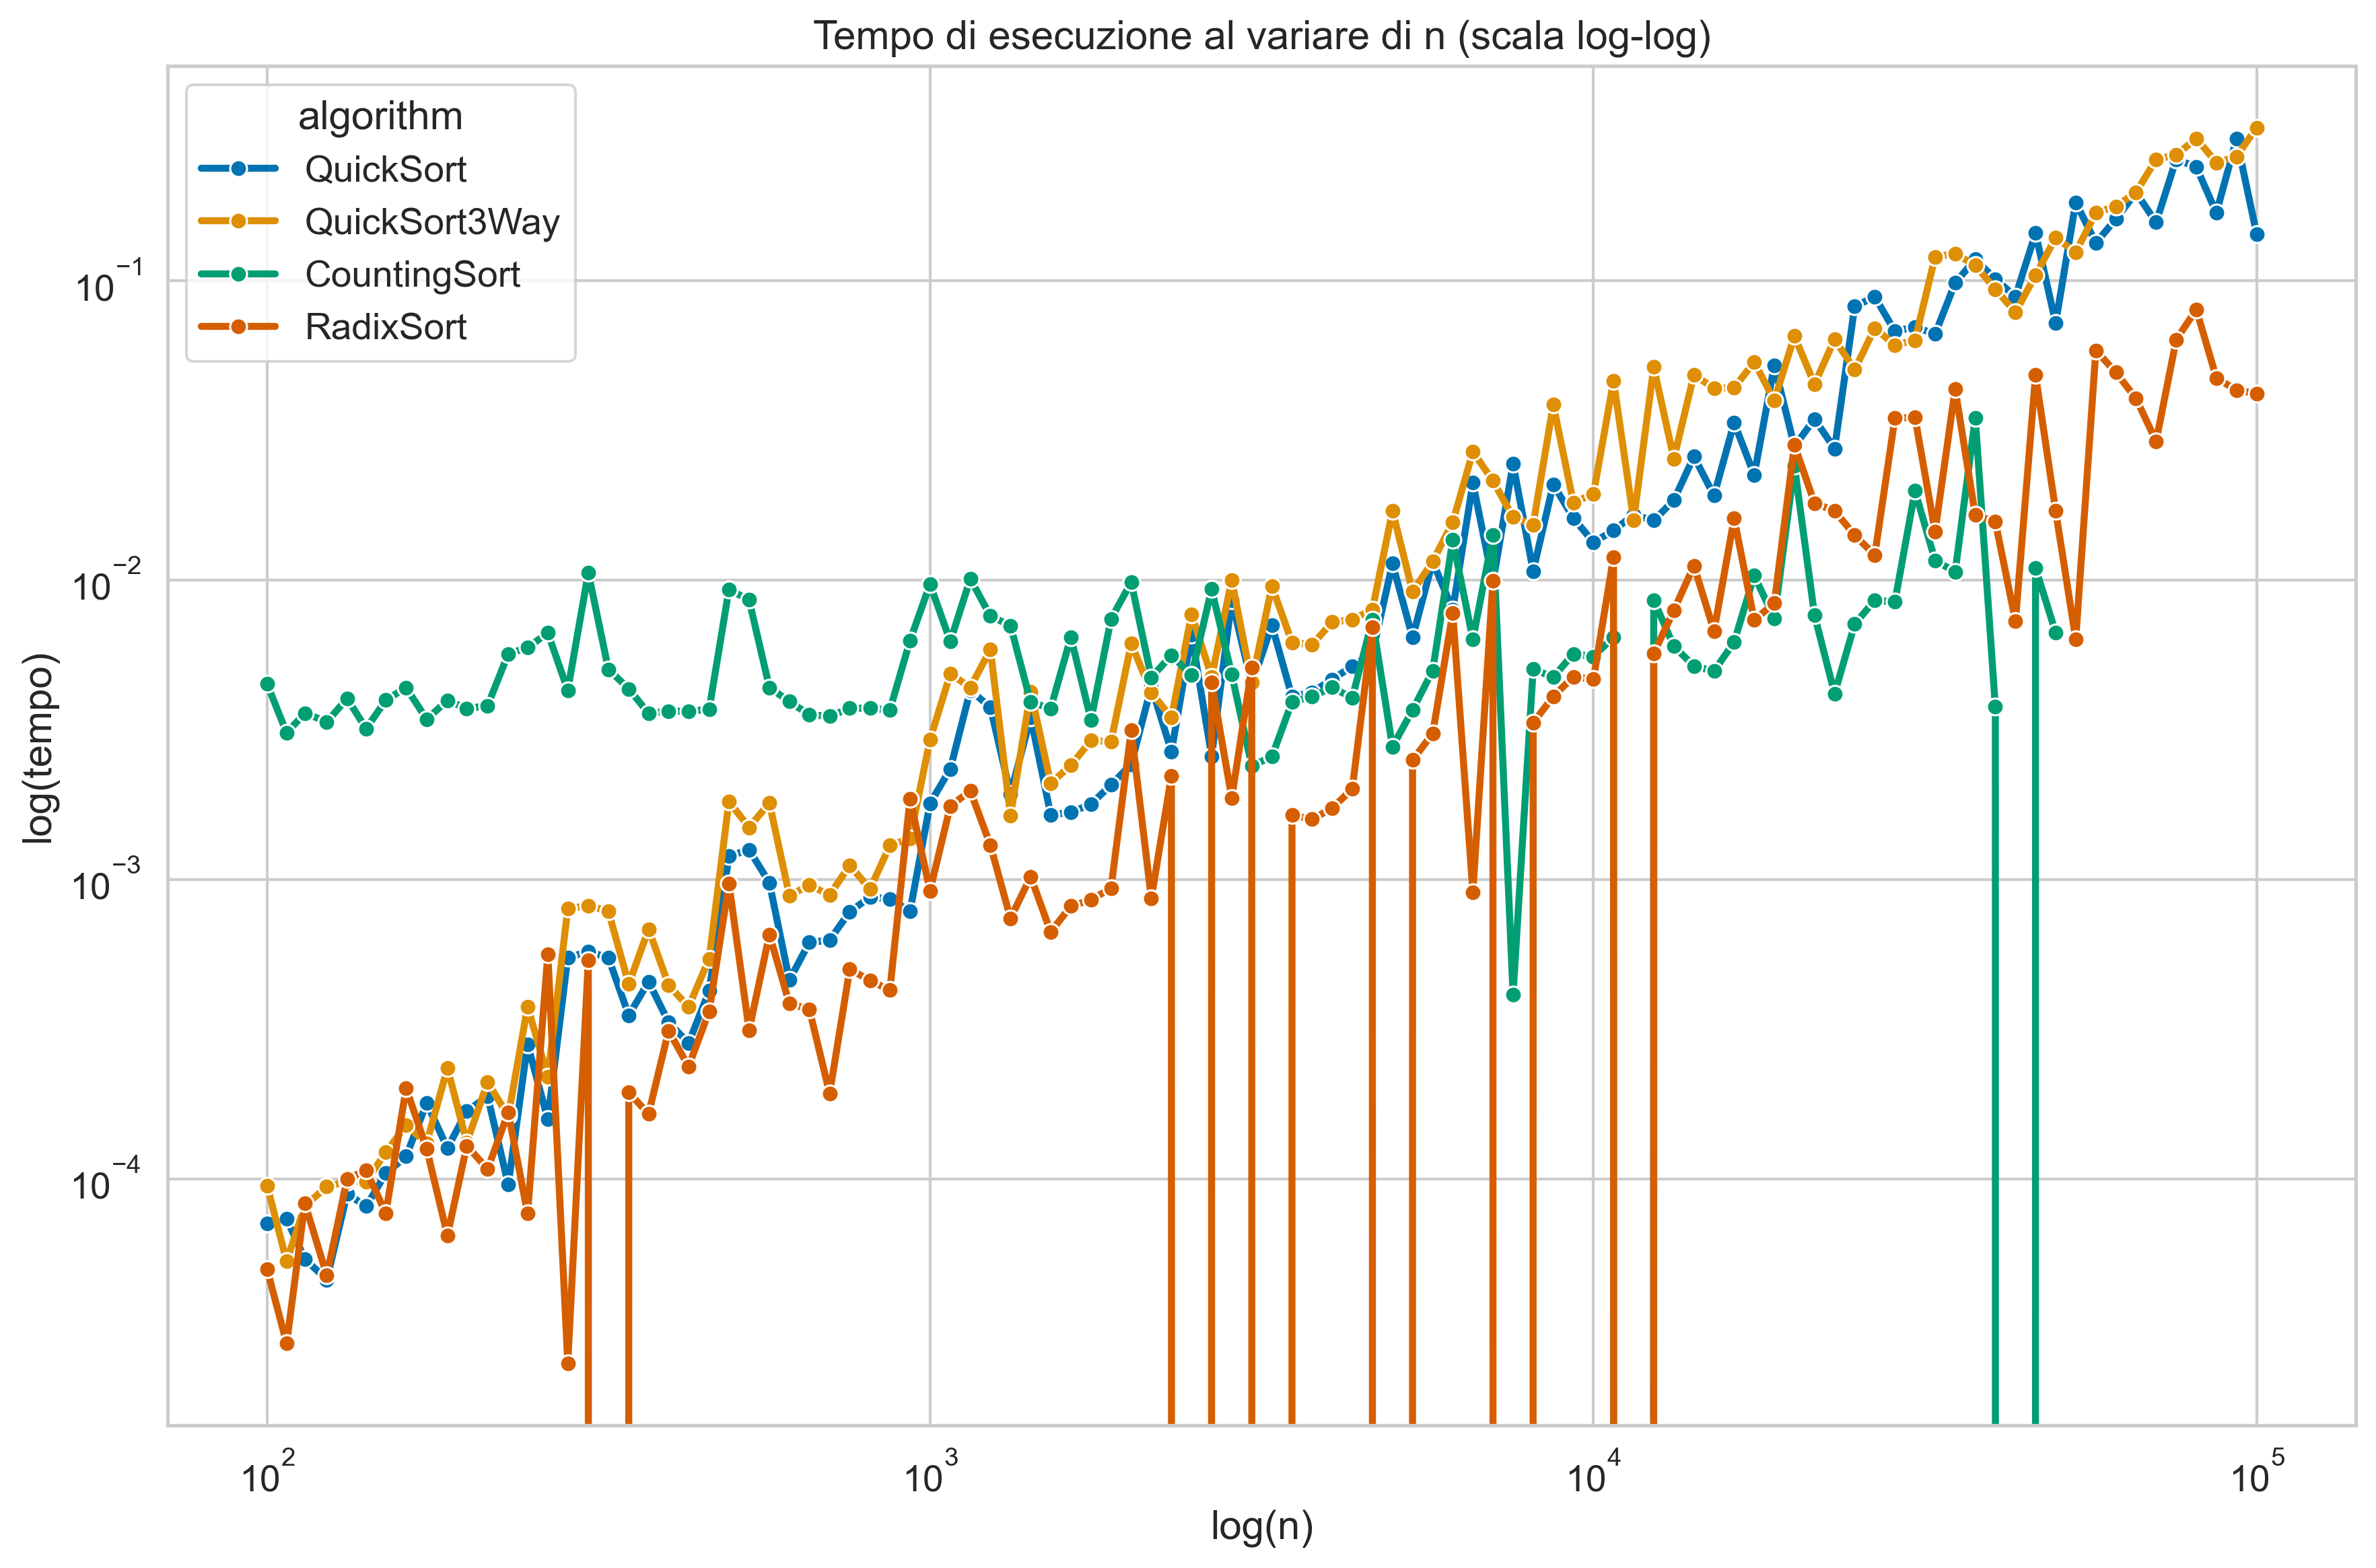

In [9]:
# GRAFICO 2: Tempo vs n (scala log-log)
plt.figure()
sns.lineplot(data=df_n, x='n', y='time', hue='algorithm', 
             marker='o', markersize=6, linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Tempo di esecuzione al variare di n (scala log-log)")
plt.xlabel("log(n)")
plt.ylabel("log(tempo)")
plt.tight_layout()
plt.savefig('tempo_vs_n_loglog.png')

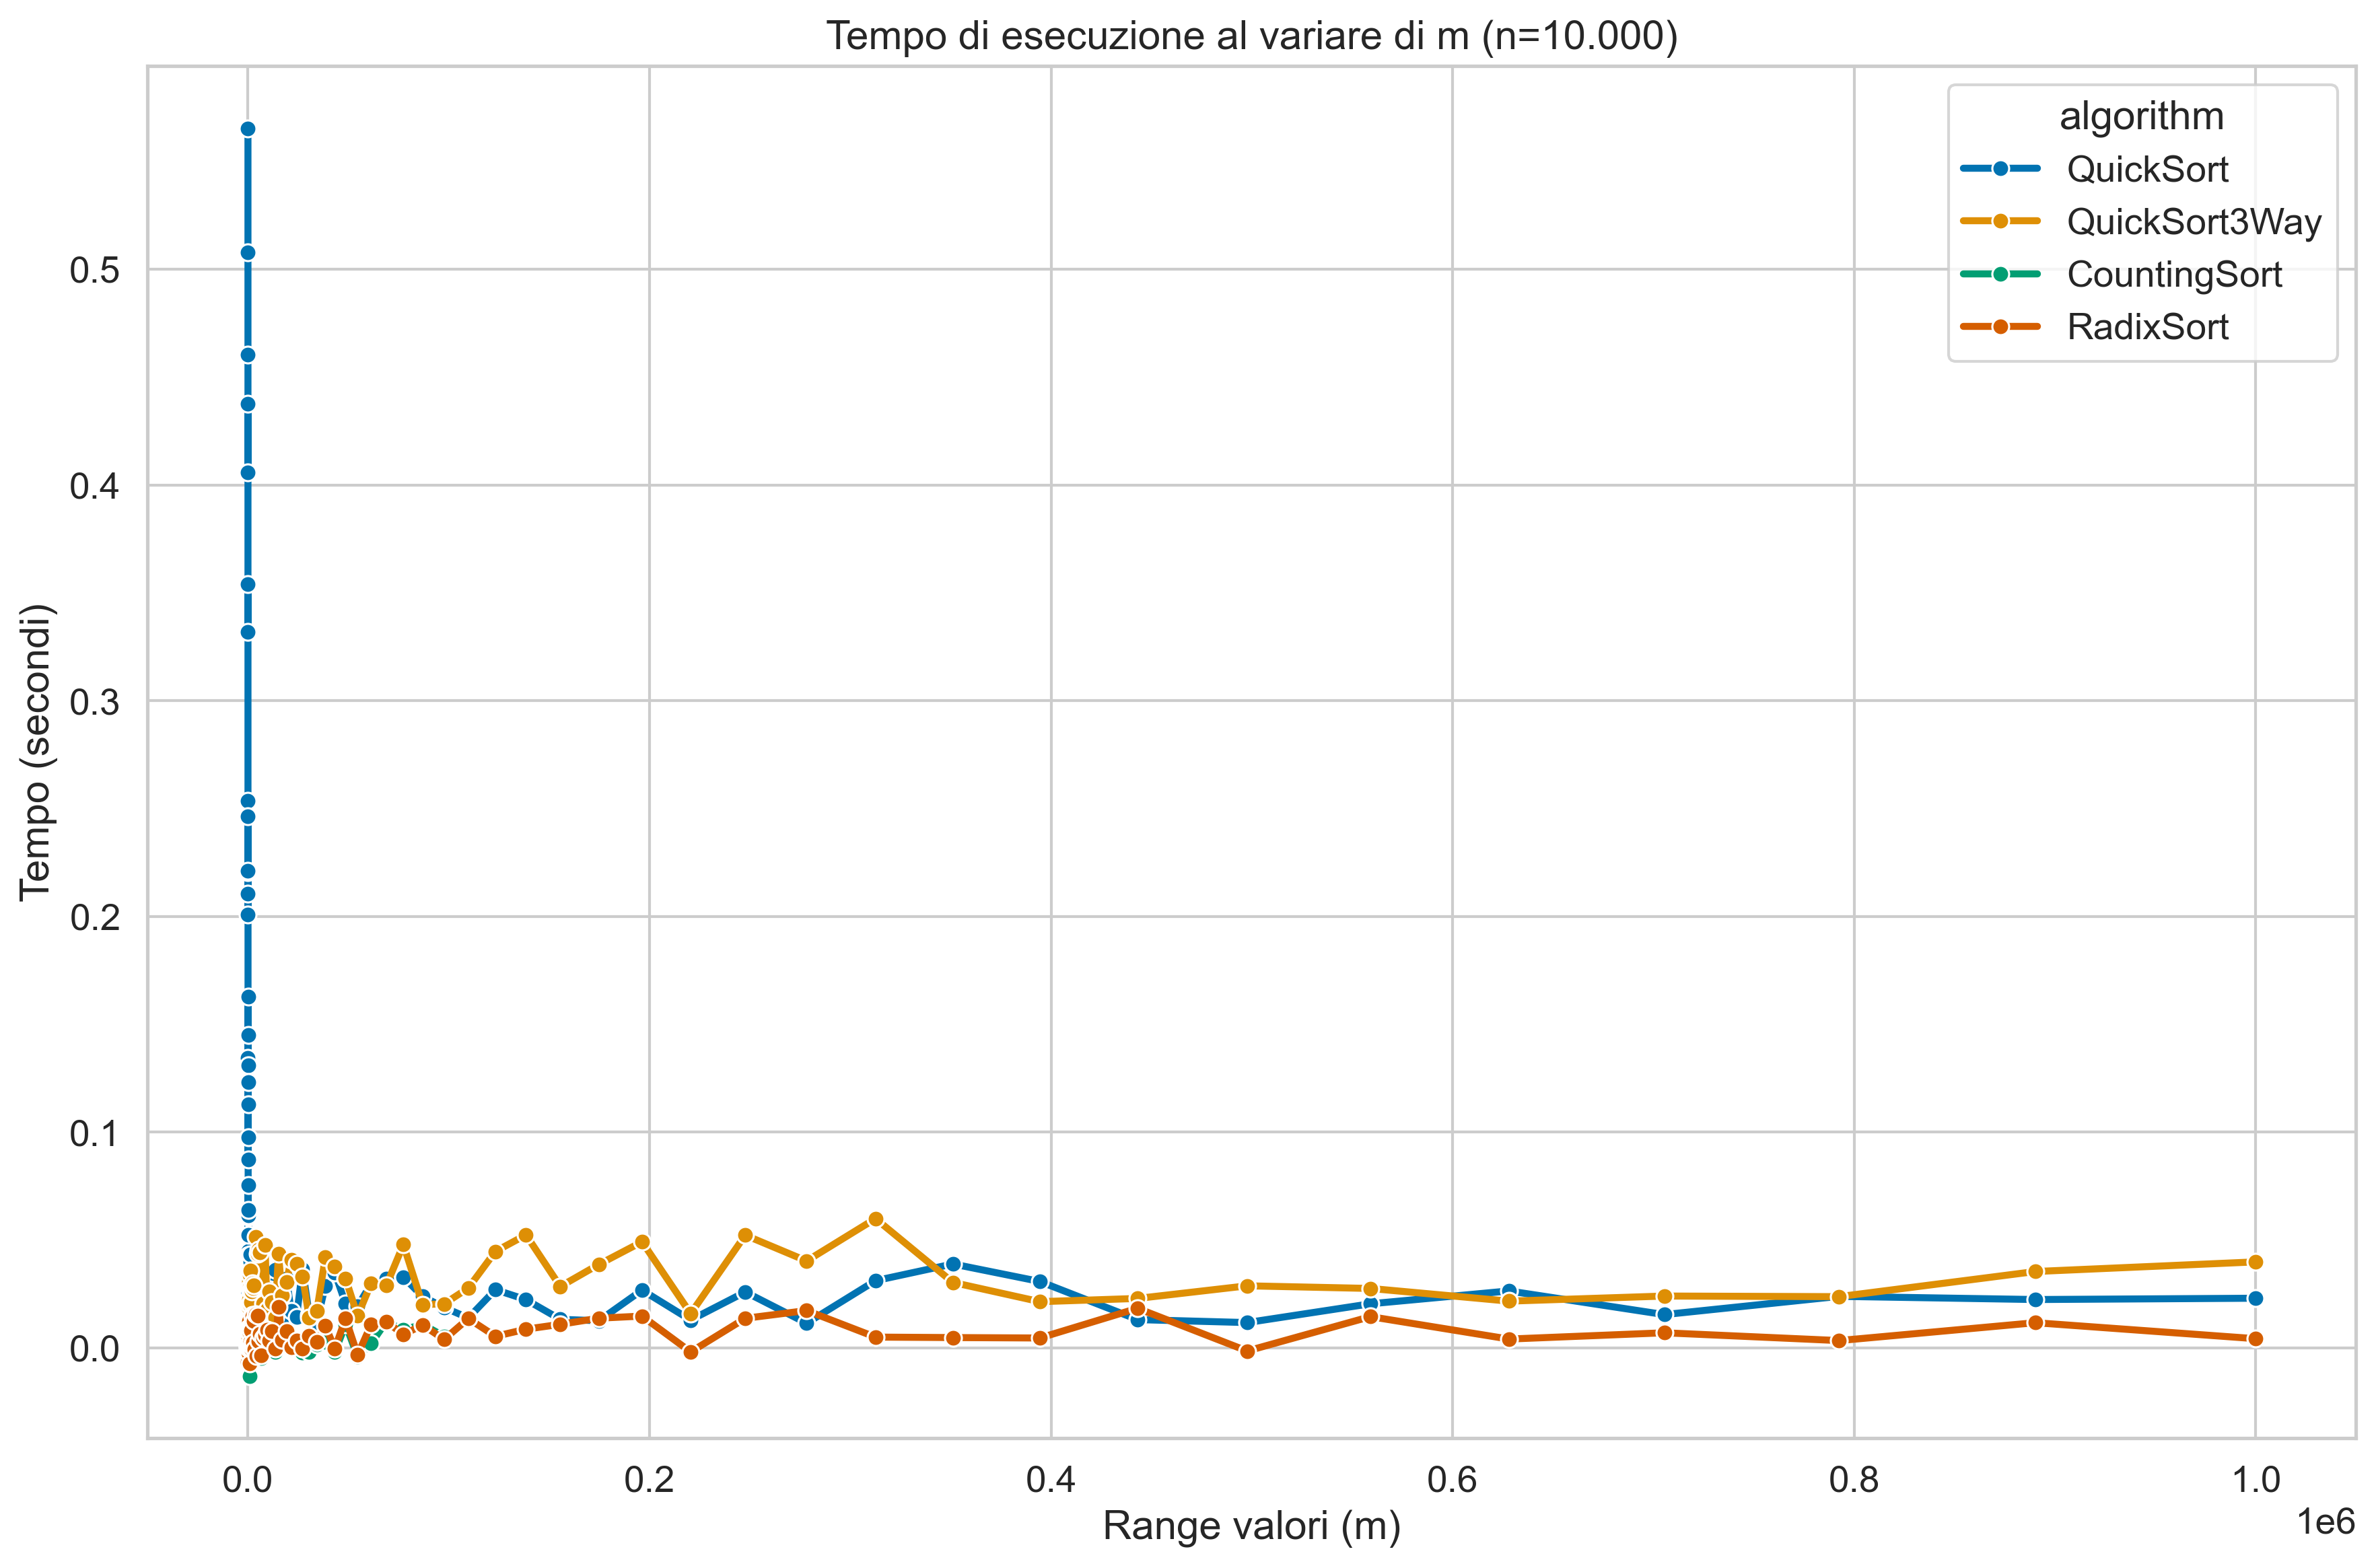

In [10]:
# GRAFICO 3: Tempo vs m (scala lineare)
plt.figure()
sns.lineplot(data=df_m, x='m', y='time', hue='algorithm', 
             marker='o', markersize=6, linewidth=2.5)
plt.title("Tempo di esecuzione al variare di m (n=10.000)")
plt.xlabel("Range valori (m)")
plt.ylabel("Tempo (secondi)")
plt.tight_layout()
plt.savefig('tempo_vs_m_lineare.png')

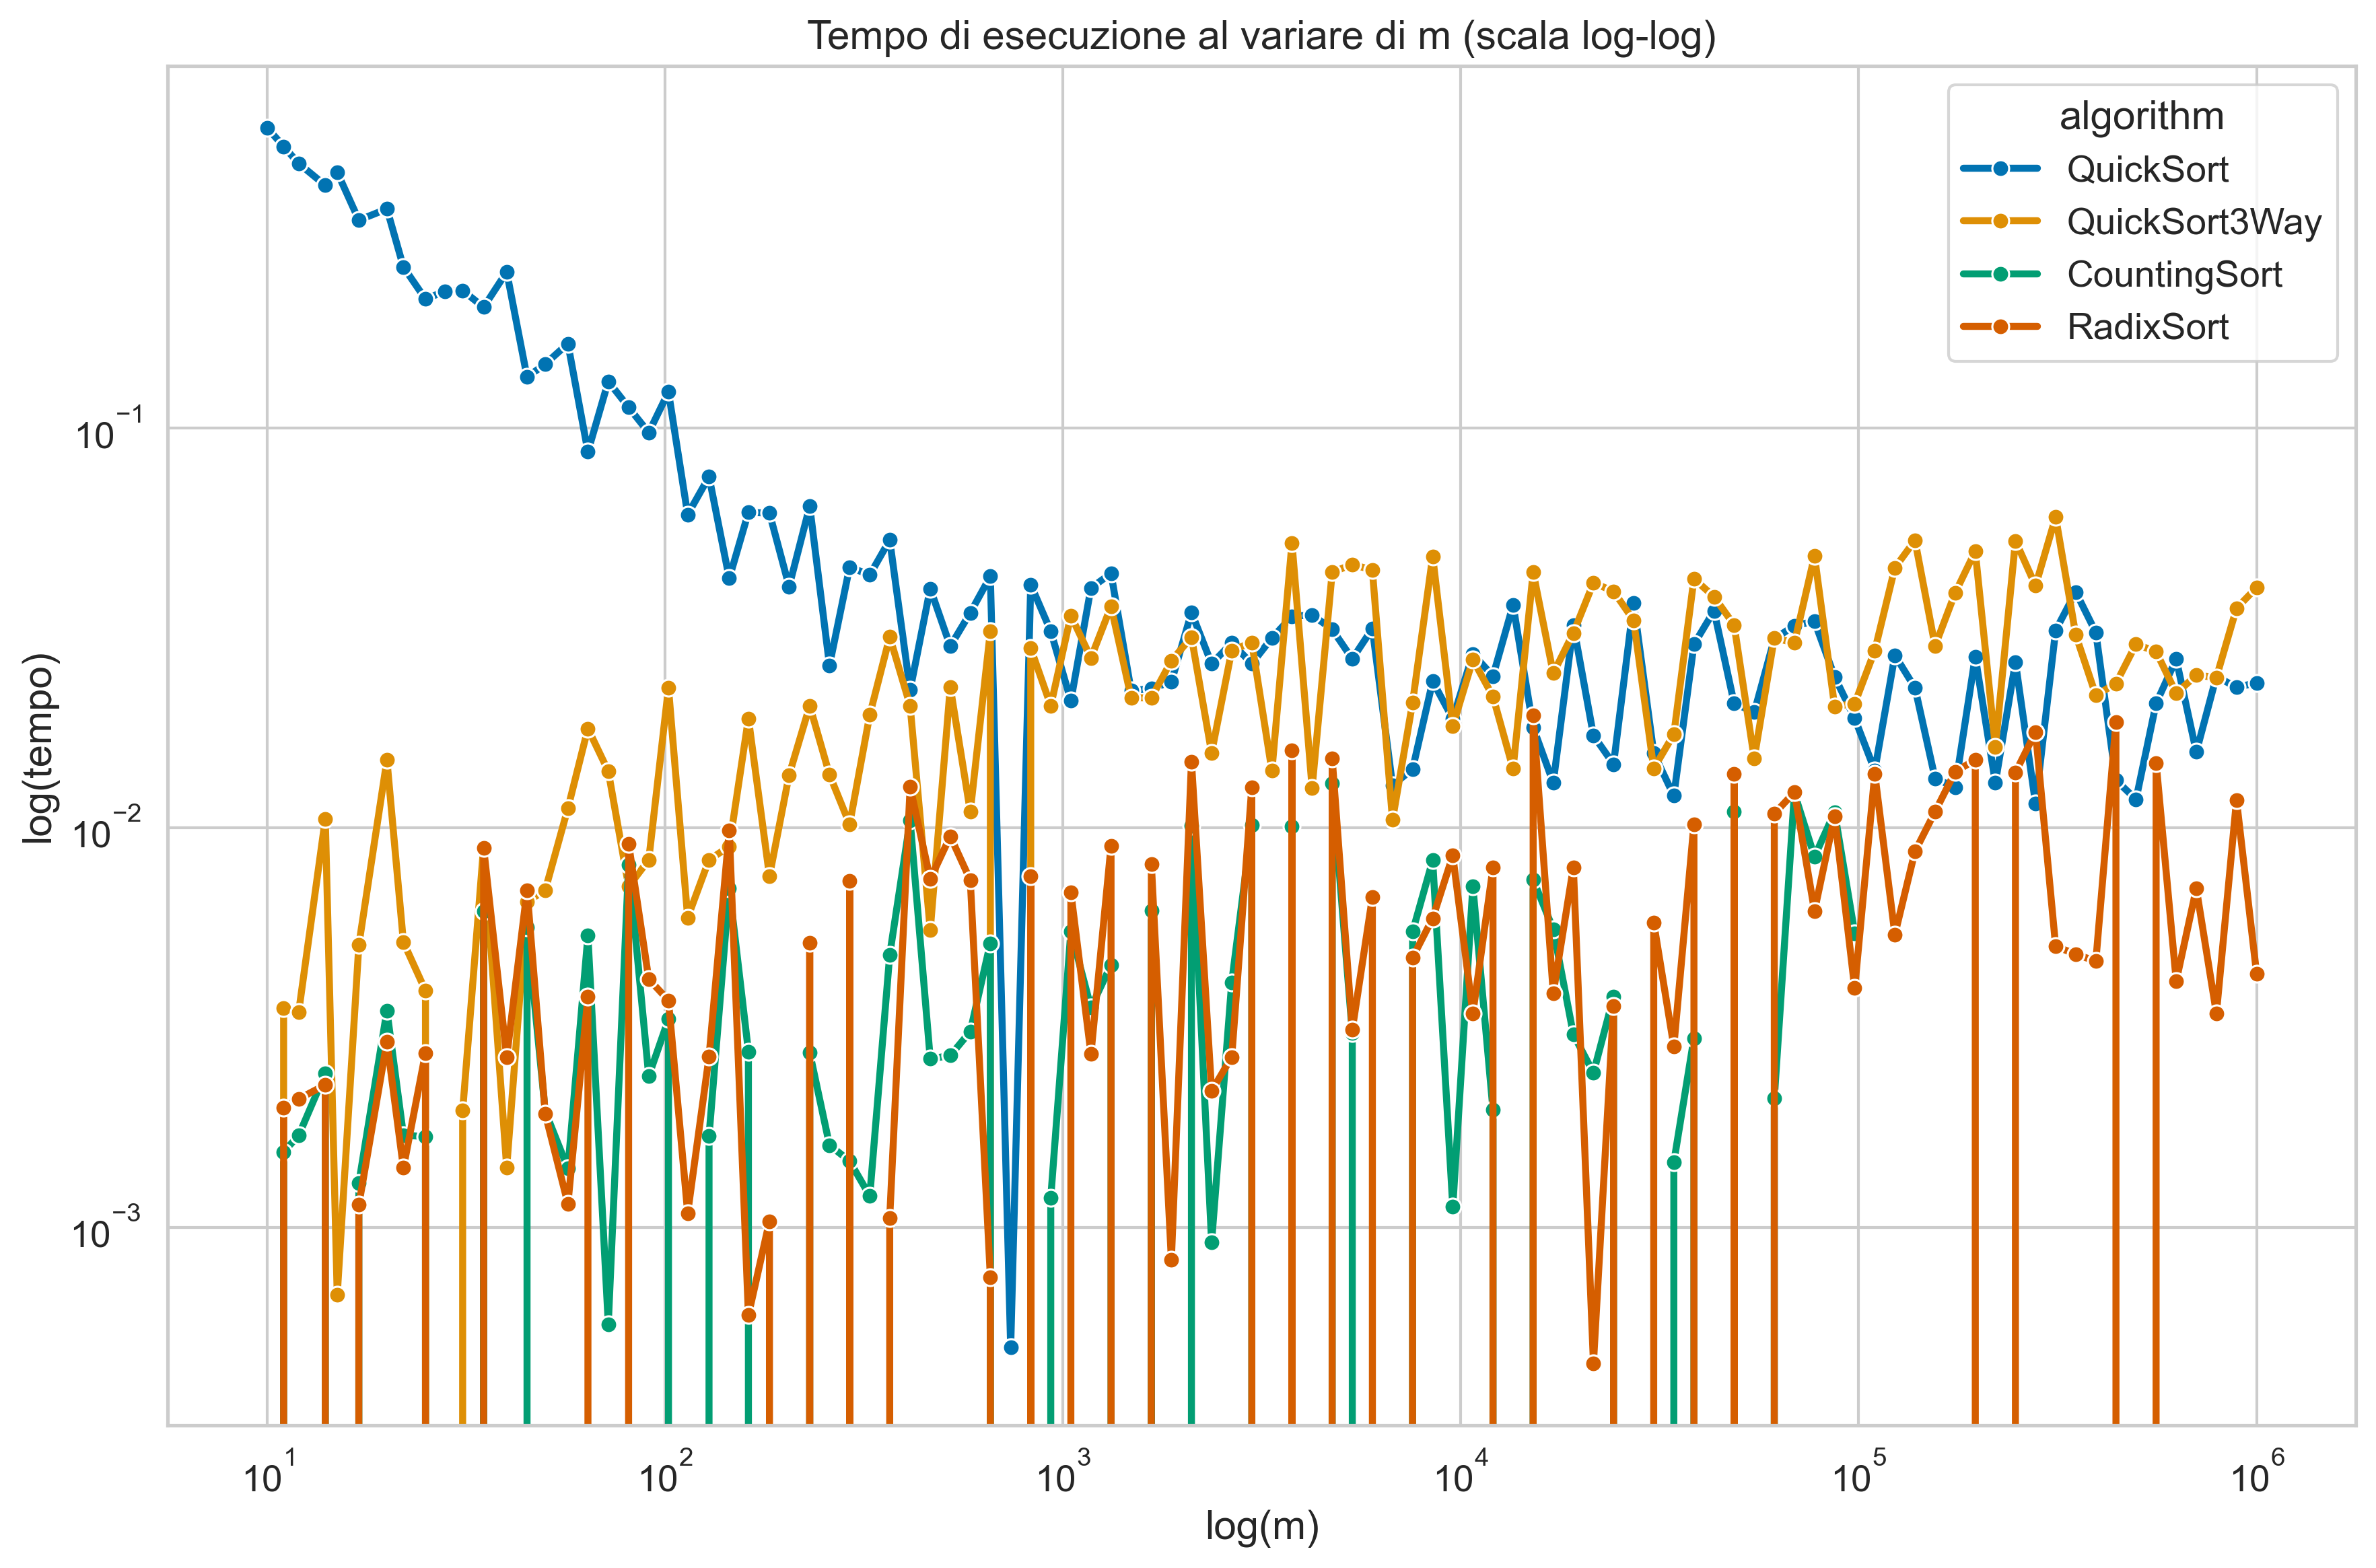

In [11]:
# GRAFICO 4: Tempo vs m (scala log-log)
plt.figure()
sns.lineplot(data=df_m, x='m', y='time', hue='algorithm', 
             marker='o', markersize=6, linewidth=2.5)
plt.xscale('log')
plt.yscale('log')
plt.title("Tempo di esecuzione al variare di m (scala log-log)")
plt.xlabel("log(m)")
plt.ylabel("log(tempo)")
plt.tight_layout()
plt.savefig('tempo_vs_m_loglog.png')

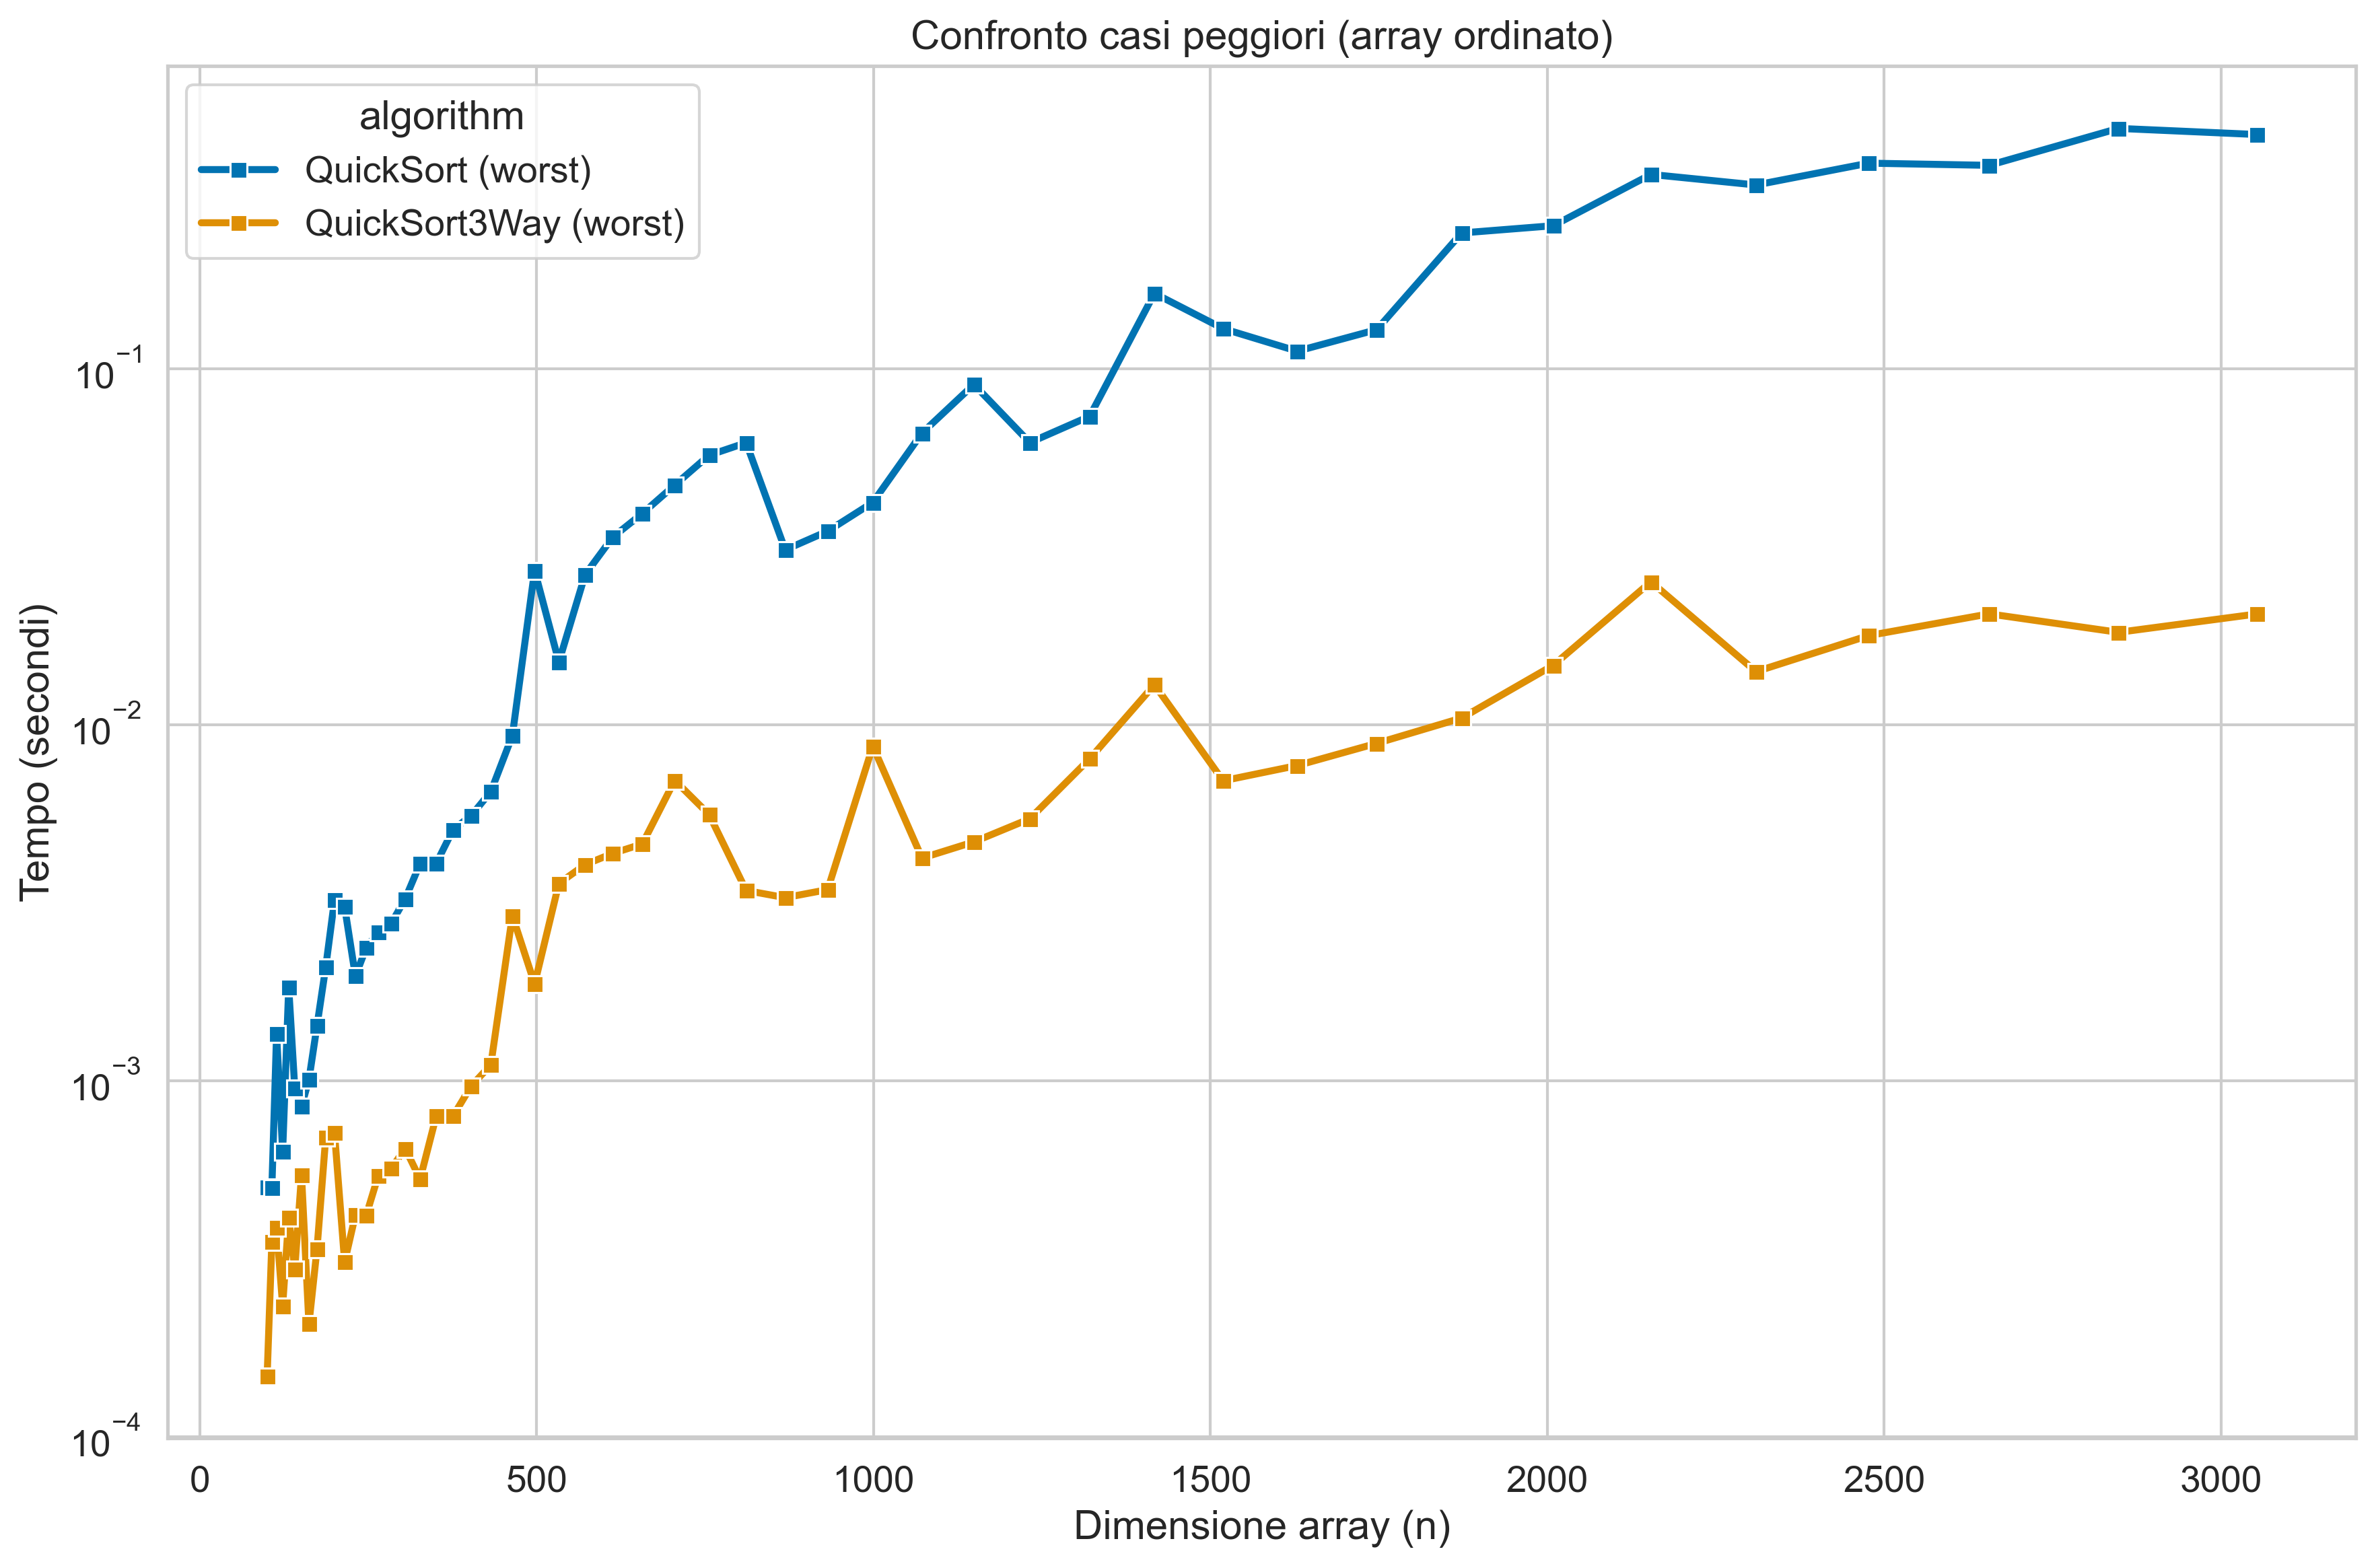

In [12]:
# GRAFICO 5: Confronto casi peggiori
plt.figure()
sns.lineplot(data=df_worst, x='n', y='time', hue='algorithm', 
             marker='s', markersize=6, linewidth=2.5)
plt.title("Confronto casi peggiori (array ordinato)")
plt.xlabel("Dimensione array (n)")
plt.ylabel("Tempo (secondi)")
plt.yscale('log')
plt.tight_layout()
plt.savefig('confronto_casi_peggiori.png')

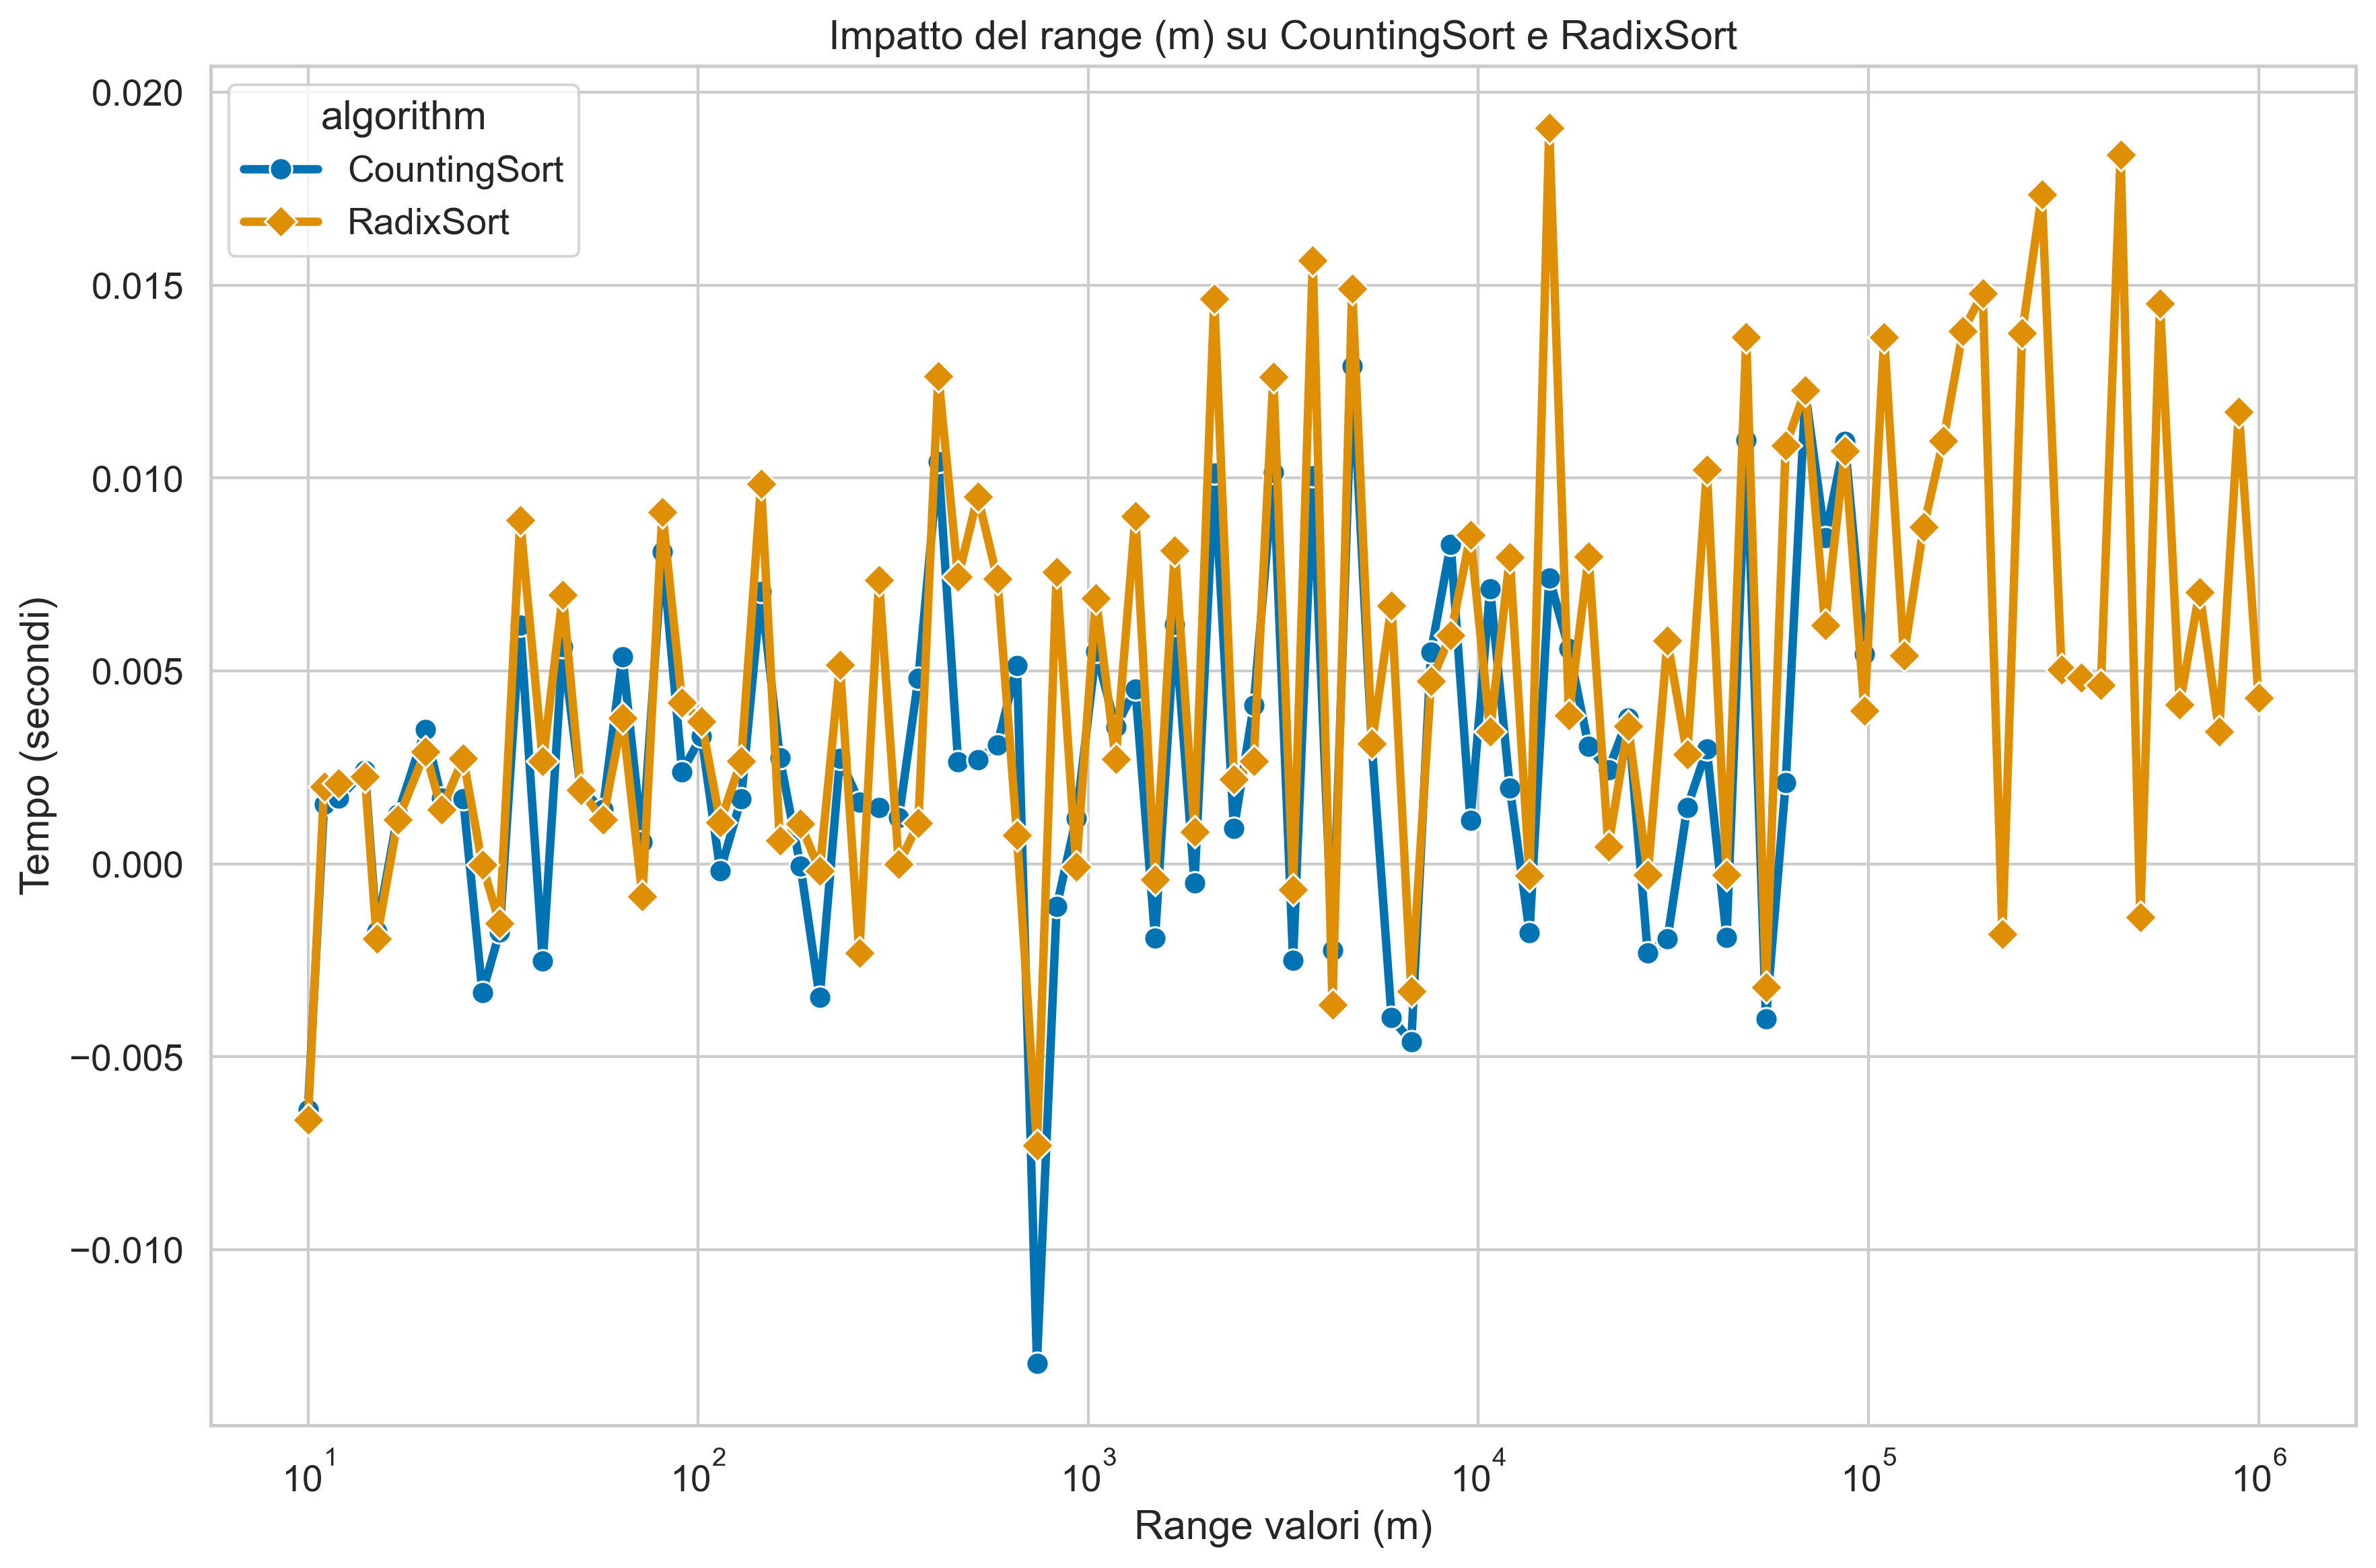

In [13]:
# GRAFICO 6: Impatto di m su CountingSort e RadixSort
plt.figure()
df_m_filtered = df_m[df_m['algorithm'].isin(['CountingSort', 'RadixSort'])]
sns.lineplot(data=df_m_filtered, x='m', y='time', hue='algorithm', 
             style='algorithm', markers=['o', 'D'], dashes=False,
             markersize=8, linewidth=3)
plt.title("Impatto del range (m) su CountingSort e RadixSort")
plt.xlabel("Range valori (m)")
plt.ylabel("Tempo (secondi)")
plt.xscale('log')
plt.tight_layout()
plt.savefig('impatto_m_counting_radix.png')

In [17]:
#salva dati
df_full = pd.concat([df_n, df_m, df_worst])
df_full.to_csv('sorting_algorithms_data.csv', index=False)